In [3]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from collections import Counter
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


- DA VEDERE IN 3D
- tagli sul triangolare
- plot con le celle in differenti geometrie
- manda distribuzione intertempi random walk
- conta i cluster della minoranza (correggi perCluster)
- decomposizione del groud state in autostati

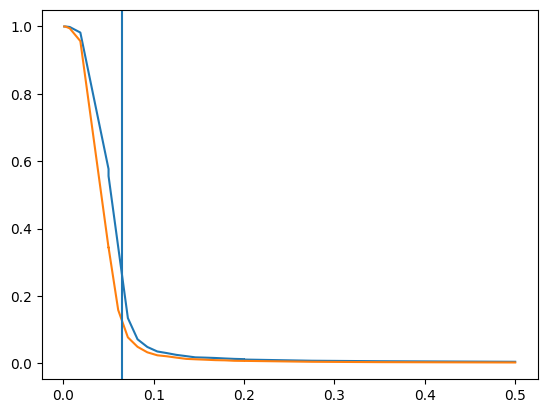

In [13]:
data = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_single.txt", delimiter=',')#data/cluster_data/l2d_triangular/phtra/L1=128_L2=64
data2 = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_hexagon.txt", delimiter=',')

data = data[data[:, -2].argsort()]
data2 = data2[data2[:, -2].argsort()]
plt.plot(data[:, -2], gaussian_filter(data[:, 1],sigma=0), '-')
plt.plot(data2[:, -2], gaussian_filter(data2[:, 1],sigma=0), '-')

plt.axvline(0.065)

In [2]:
number_of_averages = 1000
merged_dict = Counter()
for L in [8, 16, 32, 64, 128, 256, 512, 724]:
    for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(L, pflip=p, dataOutdir="data/cluster_data/")
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        if os.path.exists(filename):
            with open(filename, 'rb') as file:
                data = pickle.load(file)

In [32]:
for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(1024, pflip=p, dataOutdir="data/cluster_data/")
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        if os.path.exists(filename):
            with open(filename, 'rb') as file:
                data = pickle.load(file)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


377789 1048576
229763 524176
103051 262144
34081 65536
12642 16384
3621 4096
970 1024


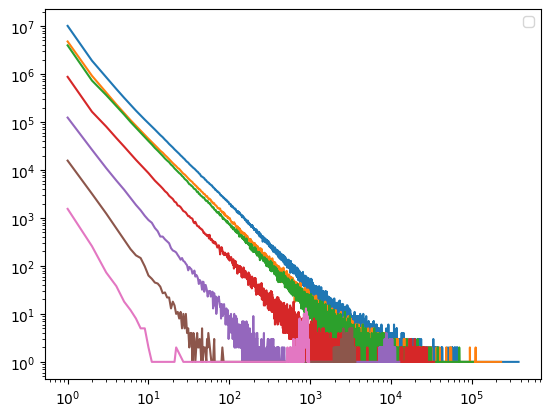

In [64]:
p = 0.103
#
for side, bins in zip(reversed([32, 64, 128, 256, 512, 724, 1024]), reversed([5, 10, 10, 6, 8, 10, 10, 10])):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={number_of_averages}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    print(np.max(sizes), side**2)
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
    plt.plot(sizes, counts)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend()

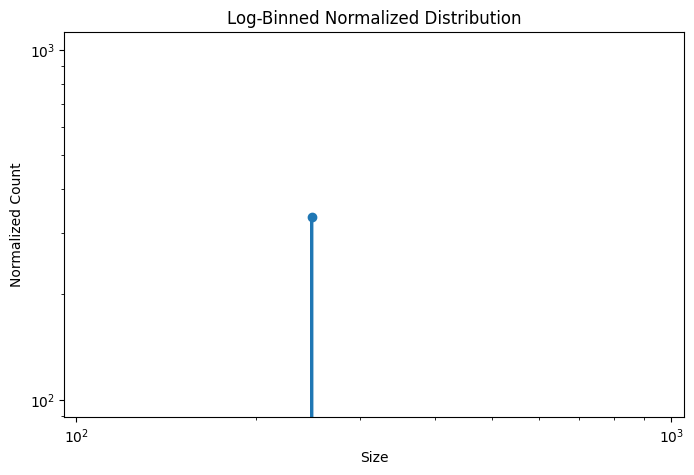

In [45]:


# Normalize counts to probabilities
total_counts = np.sum(counts)
probabilities = counts / total_counts

# Replicate sizes based on normalized probabilities for log binning
# Using np.repeat and multiplying probabilities by a large number to simulate replication
replicated_sizes = np.repeat(np.array(sizes), (probabilities * 10000).astype('int64')) 

# Perform log binning on the replicated distribution
bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=20)

# Plot the log-binned data using plt.plot
plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2)  # Normalizing y-values by bin width
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Normalized Count')
plt.title('Log-Binned Normalized Distribution')
plt.show()


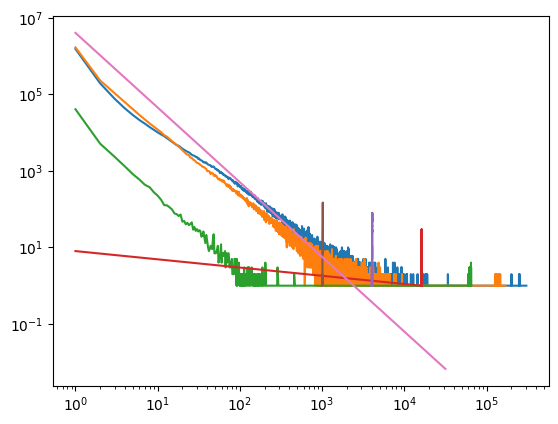

In [30]:
p = 0.034
#
for side in reversed([32, 64, 128, 256, 512, 724]):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    plt.plot(sizes, counts)
#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 4e6*x**(-1.95))
plt.xscale('log')
plt.yscale('log')